### AutoGen Intro Tutorial: Travel Planning

This tutorial will guide you through the basics of creating a multi-agent system on the example of travel planning. We will use AgentChat and utilize multiple AI agents, each with a specific role, to collaboratively create a comprehensive travale initerary. You will find small TODOs to test your knowledge! So lets get started🚀

**Architecture Overview:** 

We will use the simple yet effective RoundRobinChat, a team configuration where all agents share the same context and take turns responding in a round-robin fashion. 
Each agent, during its turn, broadcasts its response to all other agents, ensuring that the entire team maintains a consistent context.

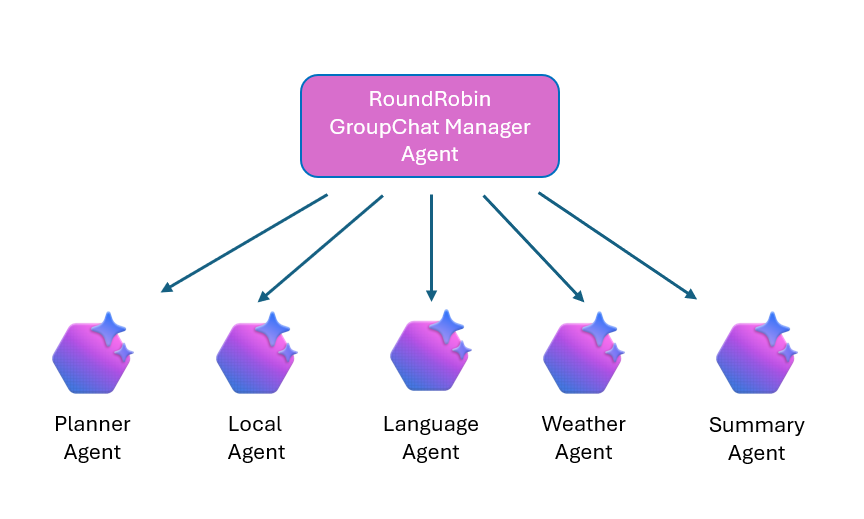

### Getting started

First, we need to import the necessary modules.

In [1]:
from autogen_agentchat.agents import AssistantAgent
from autogen_agentchat.conditions import TextMentionTermination
from autogen_agentchat.teams import RoundRobinGroupChat
from autogen_agentchat.ui import Console
from autogen_ext.models.openai import AzureOpenAIChatCompletionClient

Before defining the agents that will be used for the travel planning, we first need to set up the model client given our Azure credentials that we load from our env file.

In [ ]:
from dotenv import load_dotenv
import os

load_dotenv()

AZURE_OPENAI_KEY = os.getenv("AZURE_OPENAI_API_KEY")
AZURE_OPENAI_ENDPOINT = os.getenv("AZURE_OPENAI_ENDPOINT")
AZURE_OPENAI_API_VERSION = os.getenv("AZURE_OPENAI_API_VERSION")
deployment = os.getenv("AZURE_OPENAI_DEPLOYMENT_NAME")

model_client = AzureOpenAIChatCompletionClient(
    azure_deployment=deployment,
    model="gpt-4o",
    api_version="2024-08-01-preview",
    azure_endpoint=AZURE_OPENAI_ENDPOINT,
    api_key=AZURE_OPENAI_KEY
)

We will use the class AssistantAgent by AutoGen which is a built in language model that has the ability to use tools, we will define a very simple tool called get_weather to showcase this feature.
You can also implement your own tool which one of your agents could then use.

In [5]:
def get_weather(location: str, date:str) -> str:
    return f"The weather in {location} on {date} is sunny, 24°C."

In [ ]:
"""
TODO: 
Implement a new tool e.g get_price for calculating an approximate price for the trip. You can keep it simple for now!
you could define a list of prices for different activities e.g museum: 10-15 Euro etc and then retun the price as a string
"""

def get_price(activities: str) -> str:
    pass

Now, we can define the agents.

In [ ]:
planner_agent = AssistantAgent(
    "planner_agent",
    model_client=model_client,
    description="A helpful assistant that can plan trips.",
    system_message="You are a helpful assistant that can suggest a travel plan for a user based on their request.",
)

local_agent = AssistantAgent(
    "local_agent",
    model_client=model_client,
    description="A local assistant that can suggest local activities or places to visit.",
    tools=[get_price],
    system_message="You are a helpful assistant that can suggest authentic and interesting local activities or places to visit for a user and can utilize any context information provided. You can also provide information about the prices of activities.",
)

language_agent = AssistantAgent(
    "language_agent",
    model_client=model_client,
    description="A helpful assistant that can provide language tips for a given destination.",
    system_message="You are a helpful assistant that can review travel plans, providing feedback on important/critical tips about how best to address language or communication challenges for the given destination. If the plan already includes language tips, you can mention that the plan is satisfactory, with rationale.",
)

weather_agent = AssistantAgent(
    #TODO: Implement the weather agent that uses the get_weather tool
)

travel_summary_agent = AssistantAgent(
    #TODO: Implement the travel summary agent. Make sure to use a convincing system message that describes the agent's role in summarizing the trip plan and providing a final summary.
)

Next, we need to create the team of the agents.

In [ ]:
termination = TextMentionTermination("TERMINATE")
group_chat = RoundRobinGroupChat(
    [planner_agent, local_agent, language_agent, travel_summary_agent], termination_condition=termination
)

task = "I want to plan a 3-day trip to Rome, Italy. Suggest activities and the approximate price for that."    

#here we run the agent chat and stream the conversation in the console
await Console(group_chat.run_stream(task=task))

await model_client.close()


## Next Step

You can check your solutions in SAP-multi-agent-autogen\solutions\get-started-with-the-basics-solution.ipynb

If you are ready, go to SAP-multi-agent-autogen\tutorials\Magentic-One-Demo.ipynb to see a more advanced concept of a multi-agent system called **Magentic-One**
